# **EJERCICIO 2**
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv")
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [7]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [8]:
df[["Screen_Size_cm"]] = np.round(df[["Screen_Size_cm"]], 2)
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


## **1. Missing data**

In [15]:
missing_values = df.isnull()
print(missing_values)

     Manufacturer  Category  Screen    GPU     OS  CPU_core  Screen_Size_cm  \
0           False     False   False  False  False     False           False   
1           False     False   False  False  False     False           False   
2           False     False   False  False  False     False           False   
3           False     False   False  False  False     False           False   
4           False     False   False  False  False     False           False   
..            ...       ...     ...    ...    ...       ...             ...   
233         False     False   False  False  False     False           False   
234         False     False   False  False  False     False           False   
235         False     False   False  False  False     False           False   
236         False     False   False  False  False     False           False   
237         False     False   False  False  False     False           False   

     CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_

In [18]:
for column in missing_values.columns.tolist():
    print(missing_values[column].value_counts())
    print("")

Manufacturer
False    238
Name: count, dtype: int64

Category
False    238
Name: count, dtype: int64

Screen
False    238
Name: count, dtype: int64

GPU
False    238
Name: count, dtype: int64

OS
False    238
Name: count, dtype: int64

CPU_core
False    238
Name: count, dtype: int64

Screen_Size_cm
False    234
True       4
Name: count, dtype: int64

CPU_frequency
False    238
Name: count, dtype: int64

RAM_GB
False    238
Name: count, dtype: int64

Storage_GB_SSD
False    238
Name: count, dtype: int64

Weight_kg
False    233
True       5
Name: count, dtype: int64

Price
False    238
Name: count, dtype: int64



In [19]:
# Weight_kg -- Remplazar con media
avg_weight = df["Weight_kg"].mean()
print(avg_weight)
df["Weight_kg"] = df["Weight_kg"].replace(np.nan, avg_weight)

1.8622317596566522


In [24]:
# Screen_Size_cm -- Reemplazar con frecuencias
common_screen_size = df["Screen_Size_cm"].value_counts().idxmax()
df["Screen_Size_cm"].replace(np.nan, common_screen_size, inplace=True)

## **2. Arreglar tipo de datos**

En el df original había porblemas con los tipos de datos, pero en este caso no.

In [25]:
df.dtypes

Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

## **3. Data Standarization**
El tamaño de la pantalla y el peso debería de esta en pulgadas y en libras.

In [26]:
df["Screen_Size_cm"] = df["Screen_Size_cm"]/2.54
df["Weight_kg"] = df["Weight_kg"]*2.205

In [29]:
df.rename(columns={"Screen_Size_cm": "Screen_Size_inch", "Weight_kg": "Weight_pounds"},inplace=True)
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,Acer,4,IPS Panel,2,1,5,14.000000,1.6,8,256,3.52800,978
1,Dell,3,Full HD,1,1,3,15.598425,2.0,4,256,4.85100,634
2,Dell,3,Full HD,1,1,7,15.598425,2.7,8,256,4.85100,946
3,Dell,4,IPS Panel,2,1,5,13.299213,1.6,8,128,2.69010,1244
4,HP,4,Full HD,2,1,7,15.598425,1.8,8,256,4.21155,837


In [30]:
# Normalizar CPU_frequency

df["CPU_frequency"] = df["CPU_frequency"]/df["CPU_frequency"].max()
df["CPU_frequency"]

0      0.551724
1      0.689655
2      0.931034
3      0.551724
4      0.620690
         ...   
233    0.896552
234    0.827586
235    0.896552
236    0.862069
237    0.793103
Name: CPU_frequency, Length: 238, dtype: float64

## **4. Binning**

Crear Price-binned con "Low", "Medium" y "High".

In [31]:
df["Price"]

0       978
1       634
2       946
3      1244
4       837
       ... 
233    1891
234    1950
235    2236
236     883
237    1499
Name: Price, Length: 238, dtype: int64

In [32]:
bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)
bins

array([ 527.        , 1621.33333333, 2715.66666667, 3810.        ])

In [33]:
group_names = ["Low", "Medium", "High"]
df["Price-binned"] = pd.cut(df["Price"], bins, labels=group_names, include_lowest=True)
df[["Price", "Price-binned"]].head(10)

,Price,Price-binned
0,978,Low
1,634,Low
2,946,Low
3,1244,Low
4,837,Low
5,1016,Low
6,1117,Low
7,866,Low
8,812,Low
9,1068,Low


Text(0.5, 1.0, 'Precio - bins')

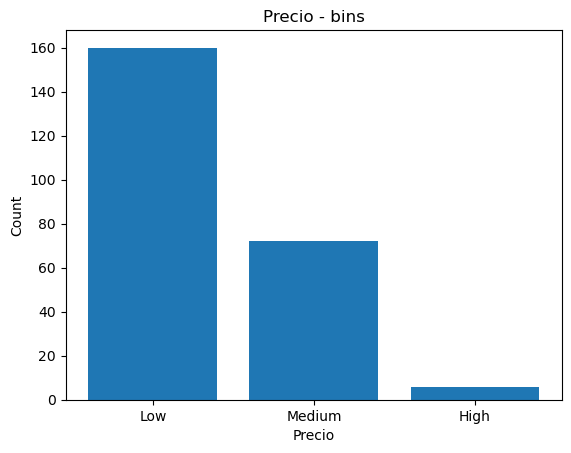

In [36]:
plt.bar(group_names, df["Price-binned"].value_counts())
plt.xlabel("Precio")
plt.ylabel("Count")
plt.title("Precio - bins")

## **5. Indicadores de variables**

Convertir "Screen" en 2 indicadores de variables. Luego eliminar Screen.

In [37]:
dummy_variable = pd.get_dummies(df["Screen"])
dummy_variable

,Full HD,IPS Panel
0,False,True
1,True,False
2,True,False
3,False,True
4,True,False
...,...,...
233,False,True
234,True,False
235,False,True
236,True,False


In [42]:
dummy_variable.rename(columns={"Full HD":"Screen - Full HD", "IPS Panel": "Screen - IPS Panel"}, inplace=True)
dummy_variable

,Screen - Full HD,Screen - IPS Panel
0,False,True
1,True,False
2,True,False
3,False,True
4,True,False
...,...,...
233,False,True
234,True,False
235,False,True
236,True,False


In [47]:
df = pd.concat([df, dummy_variable], axis=1)

In [ ]:
df.drop("Screen", axis=1, inplace=True)

In [48]:
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen - Full HD,Screen - IPS Panel
0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,False,True
1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,True,False
2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,True,False
3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,False,True
4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,True,False
